## Neural Networks, Structure, Weights and Matrices

<br><br>

### Introduction

<br>
<img width="60%" class="imgright" src="../images/network_weights_marvin.webp" srcset="../images/network_weights_marvin_800w.webp 800w,../images/network_weights_marvin_700w.webp 700w,../images/network_weights_marvin_600w.webp 600w,../images/network_weights_marvin_500w.webp 500w,../images/network_weights_marvin_400w.webp 400w,../images/network_weights_marvin_350w.webp 350w,../images/network_weights_marvin_300w.webp 300w" alt="The Weights in a Neural Network and Marvin" />

We introduced the basic ideas about neural networks in the previous chapter of our machine learning tutorial.

We have pointed out the similarity between neurons and neural networks in biology. We also introduced very small articial neural networks and introduced decision boundaries and the XOR problem.

In the simple examples we introduced so far, we saw that the weights are the essential parts of a neural network. Before we start to write a neural network with multiple layers, we need to have a closer look at the weights. 

We have to see how to initialize the weights and how to efficiently multiply the weights with the input values. 

In the following chapters we will design a neural network in Python, which consists of three layers, i.e. the input layer, a hidden layer and an output layer. You can see this neural network structure in the following diagram. We have an input layer with three nodes $i_1, i_2, i_3$ These nodes get the corresponding input values $x_1, x_2, x_3$. The middle or hidden layer has four nodes $h_1, h_2, h_3, h_4$. The input of this layer stems from the input layer. We will discuss the mechanism soon. Finally, our output layer consists of the two nodes $o_1, o_2$

The input layer is different from the other layers. The nodes of the input layer are passive. This means that the input neurons do not change the data, i.e. there are no weights used in this case. They receive a single value and duplicate this value to their many outputs.


![Neuronal Network with 3 input, 4 hidden und 2 output nodes](../images/example_network_3_4_2_without_bias.webp "Neuronal Network with 3 input, 4 hidden und 2 output nodes")

The input layer consists of the nodes $i_1$, $i_2$ and $i_3$. In principle the input is a one-dimensional vector, like 
(2, 4, 11). A one-dimensional vector is represented in numpy like this:

In [1]:
import numpy as np

input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


In the algorithm, which we will write later, we will have to transpose it into a column vector, i.e. a two-dimensional array with just one column:

In [2]:
import numpy as np

input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)

print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


### Weights and Matrices

Each of the arrows in our network diagram has an associated weight value. We will only look at the arrows between the input and the output layer now. 

![Links/Arrows between input and hidden layer with example values](../images/weights_input2hidden_example_values.webp "Links/Arrows between input and hidden layer with example values")

The value $x_1$ going into the node $i_1$ will be distributed according to the values of the weights. In the following diagram we have added some example values. Using these values, the input values ($Ih_1, Ih_2, Ih_3, Ih_4$ into the nodes ($h_1, h_2, h_3, h_4$) of the hidden layer  can be calculated like this:

$Ih_1 = 0.81 * 0.5 + 0.12 * 1 + 0.92 * 0.8 $

$Ih_2 = 0.33 * 0.5 + 0.44 * 1 + 0.72 * 0.8 $

$Ih_3 = 0.29 * 0.5 + 0.22 * 1 + 0.53 * 0.8 $

$Ih_4 = 0.37 * 0.5 + 0.12 * 1 + 0.27 * 0.8 $


Those familiar with matrices and matrix multiplication will see where it is boiling down to. We will redraw our network and denote the weights with $w_{ij}$:

![Links/Arrows between input and hidden layer](../images/weights_input2hidden_1.webp "Links/Arrows between input and hidden layer")

In order to efficiently execute all the necessary calaculations, we will arrange the weights into a weight matrix. The weights in our diagram above build an array, which we will call 'weights_in_hidden' in our Neural Network class. The name should indicate that the weights are connecting the input and the hidden nodes, i.e. they are between the input and the hidden layer. We will also abbreviate the name as 'wih'. The weight matrix between the hidden and the output layer will be denoted as "who".:

![weight matrix between the input and the hidden layer](../images/weight_matrix_input.webp "weight matrix between the input and the hidden layer")

![weight matrix between the hidden and the output layer](../images/weight_matrix_hidden.webp "weight matrix between the hidden and the output layer")

Now that we have defined our weight matrices, we have to take the next step. We have to multiply the matrix wih the input vector. Btw. this is exactly what we have manually done in our previous example.


$$\left(\begin{array}{cc} y_1\\y_2\\y_3\\y_4\end{array}\right)=\left(\begin{array}{cc} w_{11} & w_{12} & w_{13}\\w_{21} & w_{22} & w_{23}\\w_{31} & w_{32} & w_{33}\\w_{41} &w_{42}& w_{43}\end{array}\right)\left(\begin{array}{cc} x_1\\x_2\\x_3\end{array}\right)=\left(\begin{array}{cc} w_{11} \cdot x_1 + w_{12} \cdot x_2 + w_{13} \cdot x_3\\w_{21} \cdot x_1 + w_{22} \cdot x_2 + w_{23} \cdot x_3\\w_{31} \cdot x_1 + w_{32} \cdot x_2 + w_{33}\cdot x_3\\w_{41} \cdot x_1 + w_{42} \cdot x_2 + w_{43} \cdot x_3\end{array}\right)$$

We have a similar situation for the 'who' matrix between hidden and output layer. So the output $z_1$ and $z_2$ from the nodes $o_1$ and $o_2$ can also be calculated with matrix multiplications:

$$ \left(\begin{array}{cc} z_1\\z_2\end{array}\right)=\left(\begin{array}{cc} wh_{11} & wh_{12} & wh_{13} & wh_{14}\\wh_{21} & wh_{22} & wh_{23} & wh_{24}\end{array}\right)\left(\begin{array}{cc} y_1\\y_2\\y_3\\y_4\end{array}\right)=\left(\begin{array}{cc} wh_{11} \cdot y_1 + wh_{12} \cdot y_2 + wh_{13} \cdot y_3 + wh_{14} \cdot y_4\\wh_{21} \cdot y_1 + wh_{22} \cdot y_2 + wh_{23} \cdot y_3 + wh_{24} \cdot y_4\end{array}\right)$$ 

You might have noticed that something is missing in our previous calculations. We showed in our introductory chapter [Neural Networks from Scratch in Python](neural_networks.php) that we have to apply an activation or step function $\Phi$ on each of these sums. 

The following picture depicts the whole flow of calculation, i.e. the matrix multiplication and the succeeding application of the activation function.  
The matrix multiplication between the matrix wih and the matrix of the values of the input nodes $x_1, x_2, x_3$ calculates the output which will be passed to the activation function. 

![Weights Array from input to hidden layer with calculation](../images/weights_input2hidden.webp "Weights Array from input to hidden layer with calculation")

The final output $y_1, y_2, y_3, y_4$ is the input of the weight matrix who: 

Even though treatment is completely analogue, we will also have a detailled look at what is going on between our hidden layer and the output layer:

![Weights Array from hidden to output layer with calculation](../images/weights_hidden2output.webp "Weights Array from hidden  to output layer with calculation")

### Initializing the weight matrices

One of the important choices which have to be made before training a neural network consists in initializing the weight matrices. We don't know anything about the possible weights, when we start. So, we could start with arbitrary values?

As we have seen the input to all the nodes except the input nodes is calculated by applying the activation function to the following sum:

$$y_j = \sum_{i=1}^{n} w_{ji} \cdot x_i$$

(with n being the number of nodes in the previous layer and $y_j$ is the input to a node of the next layer)

We can easily see that it would not be a good idea to set all the weight values to 0, because in this case the result of this  summation will always be zero. This means that our network will be incapable of learning. This is the worst choice, but initializing a weight matrix to ones is also a bad choice. 

The values for the weight matrices should be chosen randomly and not arbitrarily. By choosing a random normal distribution we have broken possible symmetric situations, which can and often are bad for the learning process.


There are various ways to initialize the weight matrices randomly. 
The first one we will introduce is the unity function from numpy.random. It creates samples which are uniformly distributed over the half-open interval [low, high), which means that low is included and  high is excluded.  Each value within the given interval is equally likely to be drawn by 'uniform'.

In [3]:
import numpy as np

number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)

# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


The histogram of the samples, created with the uniform function in our previous example, looks like this:

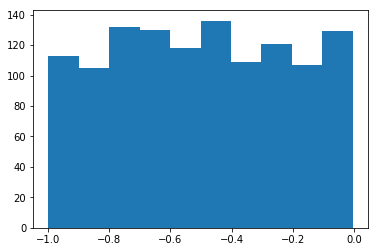

In [4]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

The next function we will look at is 'binomial' from numpy.binomial:

```
binomial(n, p, size=None)
```
  
It draws samples from a binomial distribution with specified parameters,
```n``` trials and probability ```p``` of success where ```n``` is an integer ```>= 0``` and ```p``` is 
a float in the interval [0,1]. (```n``` may be input as a float, but it is truncated to an integer in use)


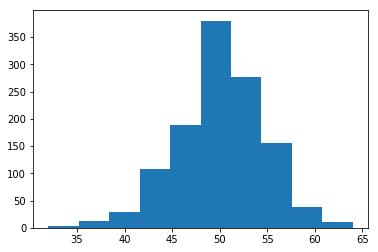

In [5]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

We like to create random numbers with a normal distribution, but the numbers have to be bounded. This is not the case with np.random.normal(), because it doesn't offer any bound parameter.

We can use truncnorm from scipy.stats for this purpose.

The standard form of this distribution is a standard normal truncated to the range [a, b] — notice that a and b are defined over the domain of the standard normal. To convert clip values for a specific mean and standard deviation, use:

```
a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
```

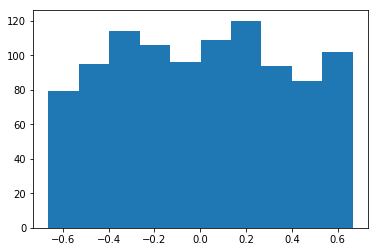

In [6]:
from scipy.stats import truncnorm

s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)

plt.hist(s)
plt.show()

The function 'truncnorm' is difficult to use.  To make life easier, we define a function ```truncated_normal``` in the following to fascilitate this task:

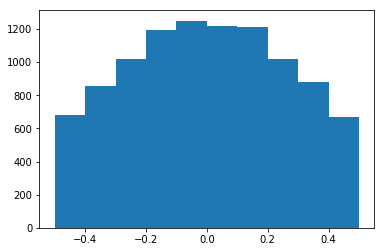

In [7]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)

plt.hist(s)
plt.show()

Further examples:

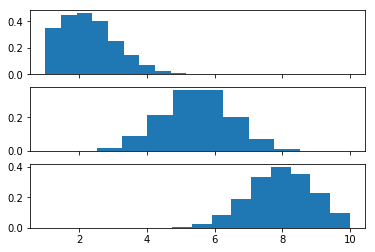

In [8]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()

We will create the link weights matrix now. ```truncated_normal``` is ideal for this purpose. 
It is a good idea to choose random values from within the interval 

$$(-\frac{1}{\sqrt{n}}, \frac{1}{\sqrt{n}})$$ where n denotes the number of input nodes. 

So we can create our "wih" matrix with:

In [9]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[-0.41379992, -0.24122842, -0.0303682 ],
       [ 0.07304837, -0.00160437,  0.0911987 ],
       [ 0.32405689,  0.5103896 ,  0.23972997],
       [ 0.097932  , -0.06646741,  0.01359876]])

Similarly, we can now define the "who" weight matrix:

In [10]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes)  # this is the input in this layer!

X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[ 0.15892038,  0.06060043,  0.35900184,  0.14202827],
       [-0.4758216 ,  0.29563269,  0.46035026, -0.29673539]])